## All Models Confusion Matrix
This will print confusion matrix data for all models in 5-shot setting

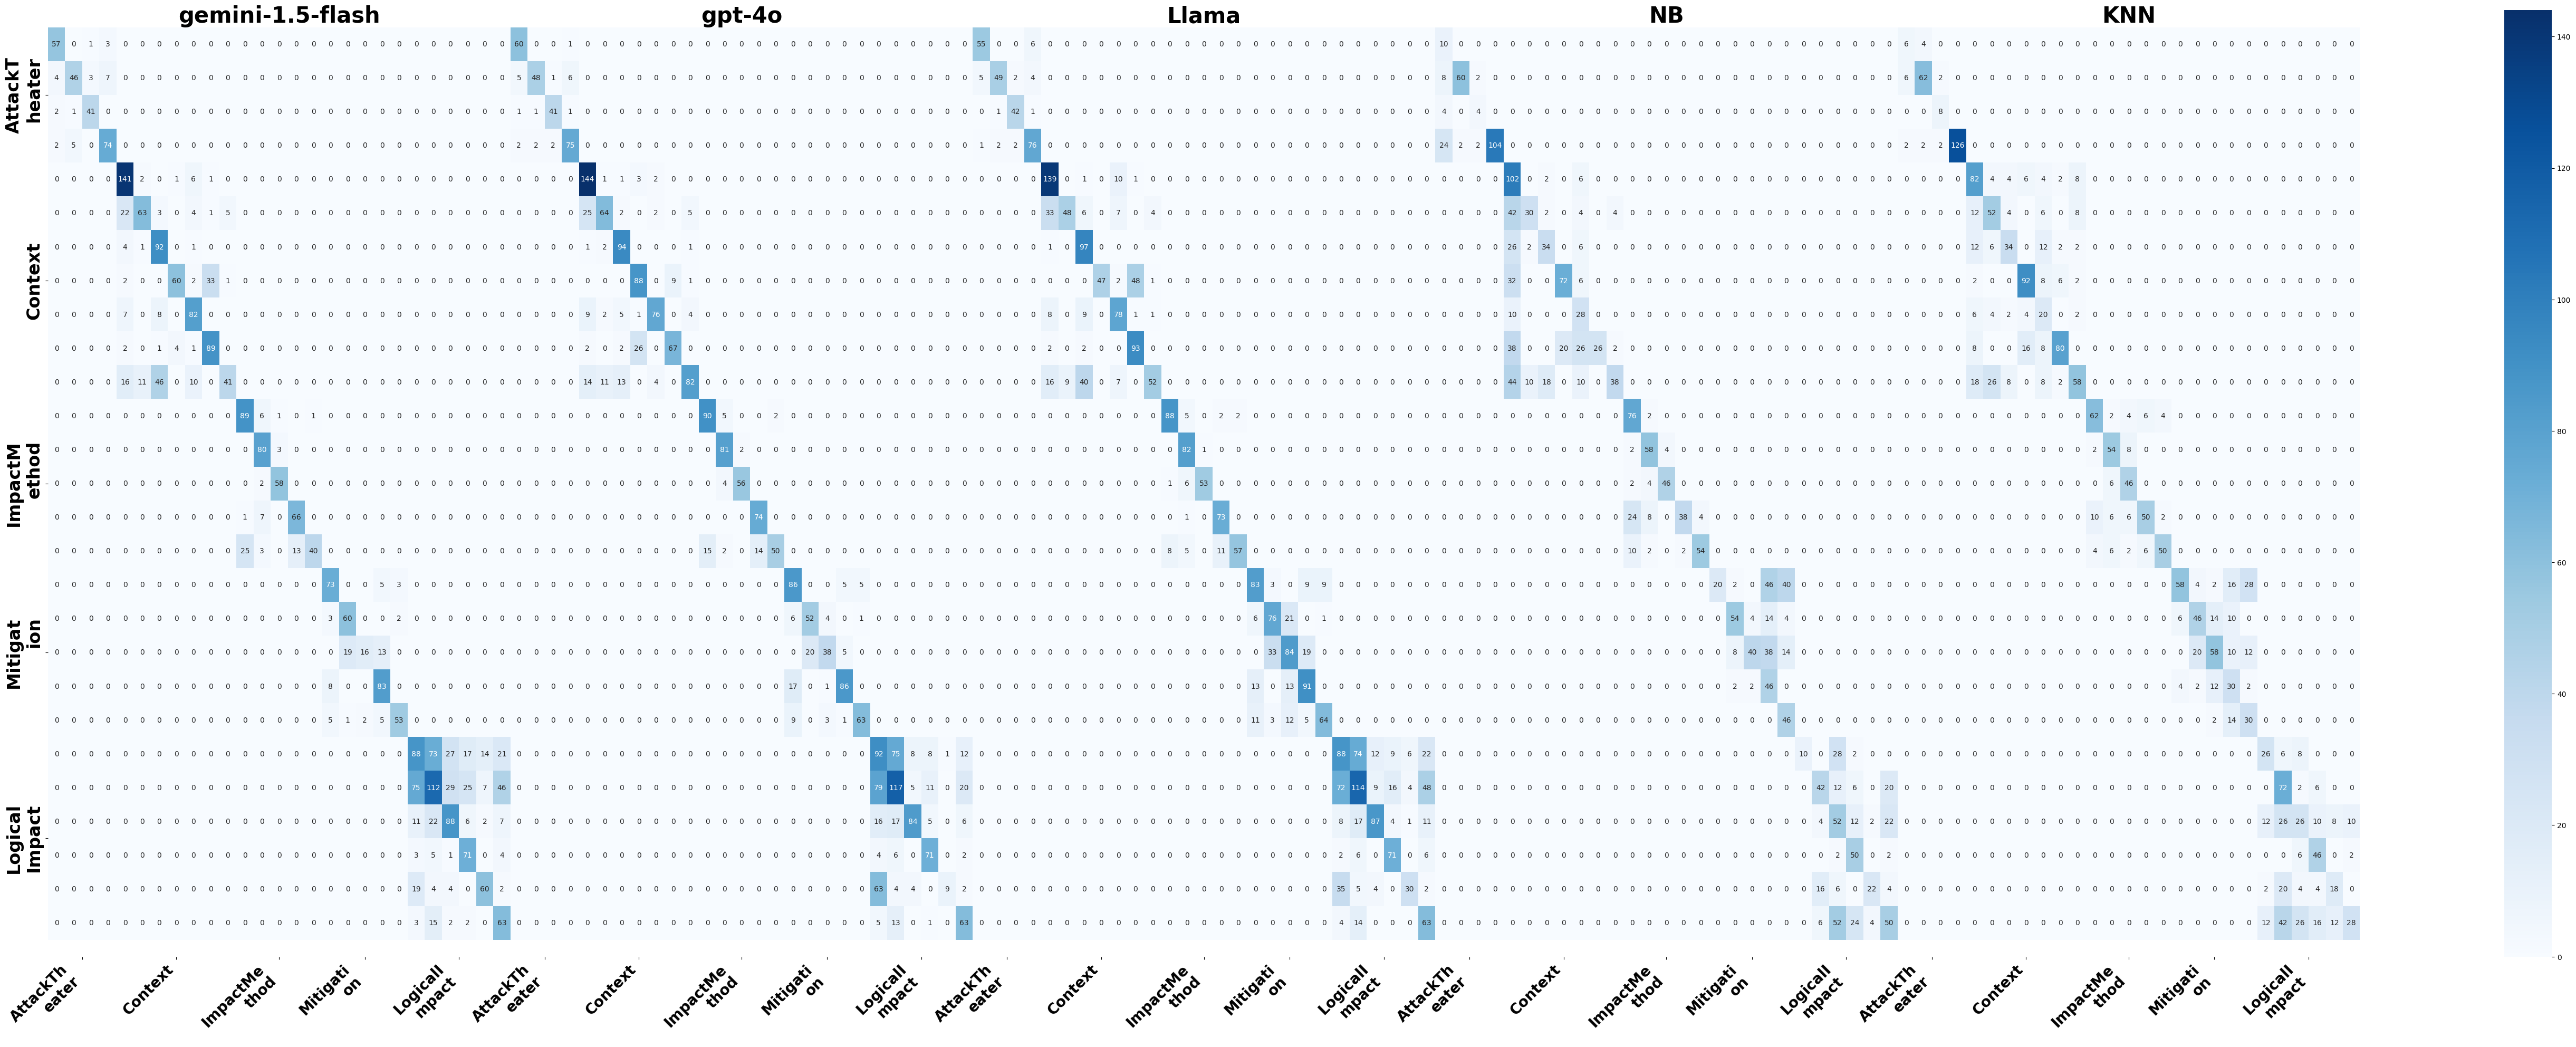

In [7]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##############################################################################
# 1) Define the row (and column) ordering for all 5 noun groups
##############################################################################

# AttackTheater: 4 classes
attack_theater_labels = [
    "Remote",
    "Limited Remote",
    "Local",
    "Physical"
]

# Context: 7 classes
context_labels = [
    "Application",
    "Hypervisor",
    "Firmware",
    "Host OS",
    "Guest OS",
    "Channel",
    "Physical Hardware"
]

# ImpactMethod: 5 classes
impact_method_labels = [
    "Trust Failure",
    "Context Escape",
    "Authentication Bypass",
    "Man-in-the-Middle",
    "Code Execution"
]

# Mitigation: 5 classes
mitigation_labels = [
    "Address Space Layout Randomization (ASLR)",
    "HPKP/HSTS",
    "Multi-Factor Authentication (MFA)",
    "Physical Security",
    "Sandboxed"
]

# LogicalImpact: 6 classes
logical_impact_labels = [
    "Read",
    "Write",
    "Resource Removal",
    "Service Interrupt",
    "Indirect Disclosure",
    "Privilege Escalation"
]

# Combine them all in one list of 27 classes
row_labels = (
    attack_theater_labels
    + context_labels
    + impact_method_labels
    + mitigation_labels
    + logical_impact_labels
)

# For clarity, let's define the size (number of classes) for each group:
size_attack = len(attack_theater_labels)        # 4
size_context = len(context_labels)             # 7
size_impact = len(impact_method_labels)        # 5
size_mitig = len(mitigation_labels)            # 5
size_logical = len(logical_impact_labels)      # 6

total_classes = size_attack + size_context + size_impact + size_mitig + size_logical  # 27

# We'll define the row ranges for each group in a 27×27:
# AttackTheater: rows 0..3, columns 0..3
# Context: rows 4..10, columns 4..10
# ImpactMethod: rows 11..15, columns 11..15
# Mitigation: rows 16..20, columns 16..20
# LogicalImpact: rows 21..26, columns 21..26

# Let's store them for easy indexing:
group_slices = {
    "AttackTheater": (0, size_attack),                # (startRow=0, length=4)
    "Context": (size_attack, size_attack + size_context),  # (4..11)
    "ImpactMethod": (size_attack + size_context,
                     size_attack + size_context + size_impact),  # (11..16)
    "Mitigation": (size_attack + size_context + size_impact,
                   size_attack + size_context + size_impact + size_mitig),  # (16..21)
    "LogicalImpact": (size_attack + size_context + size_impact + size_mitig,
                      total_classes)  # (21..27)
}

##############################################################################
# 2) Hardcode the updated confusion matrices for all models & noun groups
##############################################################################

# We'll store each matrix as confusion_matrices[(model, noun_group)] = <list of one 2D array>
confusion_matrices = {}

# AttackTheater 4x4
confusion_matrices[("gemini-1.5-flash", "AttackTheater")] = [
    np.array([[57,  0,  1,  3],
              [ 4, 46,  3,  7],
              [ 2,  1, 41,  0],
              [ 2,  5,  0, 74]])
]
confusion_matrices[("gpt-4o", "AttackTheater")] = [
    np.array([[60,  0,  0,  1],
              [ 5, 48,  1,  6],
              [ 1,  1, 41,  1],
              [ 2,  2,  2, 75]])
]
confusion_matrices[("meta", "AttackTheater")] = [
    np.array([[55,  0,  0,  6],
              [ 5, 49,  2,  4],
              [ 0,  1, 42,  1],
              [ 1,  2,  2, 76]])
]
# ML Baseline: NB & KNN
confusion_matrices[("NB", "AttackTheater")] = [
    np.array([[ 5,  0,  0,  0],
              [ 4, 30,  1,  0],
              [ 2,  0,  2,  0],
              [12,  1,  1, 52]])
]
confusion_matrices[("KNN", "AttackTheater")] = [
    np.array([[ 3,  2,  0,  0],
              [ 3, 31,  1,  0],
              [ 0,  0,  4,  0],
              [ 1,  1,  1, 63]])
]

# Context 7x7
confusion_matrices[("gemini-1.5-flash", "Context")] = [
    np.array([
        [141,   2,   0,   1,   6,   1,   0],
        [ 22,  63,   3,   0,   4,   1,   5],
        [  4,   1,  92,   0,   1,   0,   0],
        [  2,   0,   0,  60,   2,  33,   1],
        [  7,   0,   8,   0,  82,   0,   0],
        [  2,   0,   1,   4,   1,  89,   0],
        [ 16,  11,  46,   0,  10,   0,  41]
    ])
]
confusion_matrices[("gpt-4o", "Context")] = [
    np.array([
        [144,  1,  1,  3,  2,  0,  0],
        [ 25, 64,  2,  0,  2,  0,  5],
        [  1,  2, 94,  0,  0,  0,  1],
        [  0,  0,  0, 88,  0,  9,  1],
        [  9,  2,  5,  1, 76,  0,  4],
        [  2,  0,  2, 26,  0, 67,  0],
        [ 14, 11, 13,  0,  4,  0, 82]
    ])
]
confusion_matrices[("meta", "Context")] = [
    np.array([
        [139,   0,   1,   0,  10,   1,   0],
        [ 33,  48,   6,   0,   7,   0,   4],
        [  1,   0,  97,   0,   0,   0,   0],
        [  0,   0,   0,  47,   2,  48,   1],
        [  8,   0,   9,   0,  78,   1,   1],
        [  2,   0,   2,   0,   0,  93,   0],
        [ 16,   9,  40,   0,   7,   0,  52]
    ])
]
confusion_matrices[("NB", "Context")] = [
    np.array([
        [51,  0,  1,  0,  3,  0,  0],
        [21, 15,  1,  0,  2,  0,  2],
        [13,  1, 17,  0,  3,  0,  0],
        [16,  0,  0, 36,  3,  0,  0],
        [ 5,  0,  0,  0, 14,  0,  0],
        [19,  0,  0, 10, 13, 13,  1],
        [22,  5,  9,  0,  5,  0, 19]
    ])
]
confusion_matrices[("KNN", "Context")] = [
    np.array([
        [41,  2,  2,  3,  2,  1,  4],
        [ 6, 26,  2,  0,  3,  0,  4],
        [ 6,  3, 17,  0,  6,  1,  1],
        [ 1,  0,  0, 46,  4,  3,  1],
        [ 3,  2,  1,  2, 10,  0,  1],
        [ 4,  0,  0,  8,  4, 40,  0],
        [ 9, 13,  4,  0,  4,  1, 29]
    ])
]

# ImpactMethod 5x5
confusion_matrices[("gemini-1.5-flash", "ImpactMethod")] = [
    np.array([[89,  6,  1,  0,  1],
              [ 0, 80,  3,  0,  0],
              [ 0,  2, 58,  0,  0],
              [ 1,  7,  0, 66,  0],
              [25,  3,  0, 13, 40]])
]
confusion_matrices[("gpt-4o", "ImpactMethod")] = [
    np.array([[90,  5,  0,  0,  2],
              [ 0, 81,  2,  0,  0],
              [ 0,  4, 56,  0,  0],
              [ 0,  0,  0, 74,  0],
              [15,  2,  0, 14, 50]])
]
confusion_matrices[("meta", "ImpactMethod")] = [
    np.array([[88,  5,  0,  2,  2],
              [ 0, 82,  1,  0,  0],
              [ 1,  6, 53,  0,  0],
              [ 0,  1,  0, 73,  0],
              [ 8,  5,  0, 11, 57]])
]
confusion_matrices[("NB", "ImpactMethod")] = [
    np.array([
        [38,  1,  0,  0,  0],
        [ 1, 29,  2,  0,  0],
        [ 1,  2, 23,  0,  0],
        [12,  4,  0, 19,  2],
        [ 5,  1,  0,  1, 27]
    ])
]
confusion_matrices[("KNN", "ImpactMethod")] = [
    np.array([
        [31,  1,  2,  3,  2],
        [ 1, 27,  4,  0,  0],
        [ 0,  3, 23,  0,  0],
        [ 5,  3,  3, 25,  1],
        [ 2,  3,  1,  3, 25]
    ])
]

# Mitigation 5x5 (newly updated)
confusion_matrices[("gemini-1.5-flash", "Mitigation")] = [
    np.array([
        [73,  0,  0,  5,  3],
        [ 3, 60,  0,  0,  2],
        [ 0, 19, 16, 13,  0],
        [ 8,  0,  0, 83,  0],
        [ 5,  1,  2,  5, 53]
    ])
]
confusion_matrices[("gpt-4o", "Mitigation")] = [
    np.array([
        [86,  0,  0,  5,  5],
        [ 6, 52,  4,  0,  1],
        [ 0, 20, 38,  5,  0],
        [17,  0,  1, 86,  0],
        [ 9,  0,  3,  1, 63]
    ])
]
confusion_matrices[("meta", "Mitigation")] = [
    np.array([
        [83,  3,  0,  9,  9],
        [ 6, 76, 21,  0,  1],
        [ 0, 33, 84, 19,  0],
        [13,  0, 13, 91,  0],
        [11,  3, 12,  5, 64]
    ])
]

# ML Baseline for Mitigation (5x5) from old data
confusion_matrices[("NB", "Mitigation")] = [
    np.array([
        [10,  1,  0, 23, 20],
        [ 0, 27,  2,  7,  2],
        [ 0,  4, 20, 19,  7],
        [ 0,  1,  1, 23,  0],
        [ 0,  0,  0,  0, 23]
    ])
]
confusion_matrices[("KNN", "Mitigation")] = [
    np.array([
        [29,  2,  1,  8, 14],
        [ 3, 23,  7,  5,  0],
        [ 0, 10, 29,  5,  6],
        [ 2,  1,  6, 15,  1],
        [ 0,  0,  1,  7, 15]
    ])
]

# LogicalImpact 6x6 (newly updated)
confusion_matrices[("gemini-1.5-flash", "LogicalImpact")] = [
    np.array([
        [ 88,  73,  27,  17,  14,  21],
        [ 75, 112,  29,  25,   7,  46],
        [ 11,  22,  88,   6,   2,   7],
        [  3,   5,   1,  71,   0,   4],
        [ 19,   4,   4,   0,  60,   2],
        [  3,  15,   2,   2,   0,  63]
    ])
]
confusion_matrices[("gpt-4o", "LogicalImpact")] = [
    np.array([
        [ 92,  75,   8,   8,   1,  12],
        [ 79, 117,   5,  11,   0,  20],
        [ 16,  17,  84,   5,   0,   6],
        [  4,   6,   0,  71,   0,   2],
        [ 63,   4,   4,   0,   9,   2],
        [  5,  13,   0,   1,   0,  63]
    ])
]
confusion_matrices[("meta", "LogicalImpact")] = [
    np.array([
        [ 88,  74,  12,   9,   6,  22],
        [ 72, 114,   9,  16,   4,  48],
        [  8,  17,  87,   4,   1,  11],
        [  2,   6,   0,  71,   0,   6],
        [ 35,   5,   4,   0,  30,   2],
        [  4,  14,   0,   0,   0,  63]
    ])
]

# ML Baseline for LogicalImpact (6x6) from old data
confusion_matrices[("NB", "LogicalImpact")] = [
    np.array([
        [ 5,  0, 14,  1,  0,  0],
        [ 0, 21,  6,  3,  0, 10],
        [ 0,  2, 26,  6,  1, 11],
        [ 0,  0,  1, 25,  0,  1],
        [ 0,  8,  3,  0, 11,  2],
        [ 0,  3, 26, 12,  2, 25]
    ])
]
confusion_matrices[("KNN", "LogicalImpact")] = [
    np.array([
        [13,  3,  4,  0,  0,  0],
        [ 0, 36,  1,  3,  0,  0],
        [ 6, 13, 13,  5,  4,  5],
        [ 0,  0,  3, 23,  0,  1],
        [ 1, 10,  2,  2,  9,  0],
        [ 6, 21, 13,  8,  6, 14]
    ])
]
import textwrap as textwrap
##############################################################################
# 3) Define which models we'll include in the big chart (and in what order).
##############################################################################
all_models = [
    "gemini-1.5-flash",
    "gpt-4o",
    "Llama",  # Renamed "meta" to "Llama"
    "NB",
    "KNN"
]

# Create a new dictionary to store the updated confusion matrices
scaled_confusion_matrices = {}

for (model, noun_group), matrices in confusion_matrices.items():
    # Rename "meta" to "Llama" when processing
    model_name = "Llama" if model == "meta" else model

    # Check if the model is "KNN" or "NB"
    if model_name in ["KNN", "NB"]:
        # Scale the matrix values by 2
        scaled_matrices = [matrix * 2 for matrix in matrices]
    else:
        # Keep other models unchanged
        scaled_matrices = matrices
    
    # Store in the new dictionary
    scaled_confusion_matrices[(model_name, noun_group)] = scaled_matrices

##############################################################################
# 4) Function to build a single 27×27 block for a given model
##############################################################################

def build_mega_block_27x27(model):
    """
    Create a 27x27 block for the given model, placing each noun group's matrix
    into the appropriate sub-block:
      AttackTheater (4x4) rows 0..3,    cols 0..3
      Context (7x7) rows 4..10,         cols 4..10
      ImpactMethod (5x5) rows 11..15,   cols 11..15
      Mitigation (5x5) rows 16..20,     cols 16..20
      LogicalImpact (6x6) rows 21..26,  cols 21..26
    If the model does not have a matrix for a given group, those cells remain 0.
    """
    block = np.zeros((total_classes, total_classes), dtype=int)

    # Helper to place a confusion matrix mat into block for the row/col slice
    def place_matrix(noun_group, mat):
        start, end = group_slices[noun_group]  # row (and col) slice
        rsize = end - start
        # only place if shape matches
        if mat.shape == (rsize, rsize):
            block[start:end, start:end] = mat

    for noun_group in ["AttackTheater","Context","ImpactMethod","Mitigation","LogicalImpact"]:
        key = (model, noun_group)
        if key in scaled_confusion_matrices and len(scaled_confusion_matrices[key]) > 0:
            mat = scaled_confusion_matrices[key][0]  # use the first matrix
            place_matrix(noun_group, mat)

    return block

##############################################################################
# 5) Build each model's 27×27 block, then horizontally concatenate them
##############################################################################
sub_blocks = []
for m in all_models:
    sub_blocks.append(build_mega_block_27x27(m))

big_matrix = np.hstack(sub_blocks)  # shape = (27, 27 * num_models)

import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

#############################################################################
# 6) Define simplified row labels and column labels (only noun group categories)
##############################################################################
# Define the main categories
noun_groups = ["AttackTheater", "Context", "ImpactMethod", "Mitigation", "LogicalImpact"]

# Get the y-tick positions based on the start of each noun group
y_tick_positions = [group_slices[ng][0] + (group_slices[ng][1] - group_slices[ng][0]) / 2 for ng in noun_groups]
y_tick_labels = ["\n".join(textwrap.wrap(ng, width=7)) for ng in noun_groups]  # Wrap text

# Get x-tick positions for each noun group label across all models
x_tick_positions = []
x_tick_labels = []
block_width = total_classes  # 27

for i in range(len(all_models)):  # Iterate through models
    start_col = i * block_width
    for ng in noun_groups:
        mid_col = start_col + (group_slices[ng][0] + group_slices[ng][1]) / 2
        x_tick_positions.append(mid_col)
        x_tick_labels.append("\n".join(textwrap.wrap(ng, width=8)))  # Wrap text

##############################################################################
# 7) Plot the single big heatmap
##############################################################################

fig, ax = plt.subplots(figsize=(2 + 0.4 * big_matrix.shape[1], 20))  # Increased height

sns.heatmap(
    big_matrix,
    annot=True, fmt="d", cmap="Blues",
    cbar=True,  # single color bar
    xticklabels=False,  # We'll set them manually
    yticklabels=False,  # We'll set them manually
    ax=ax
)

# 7a) Set y-ticks for noun group labels (Larger font & rotated sideways with wrapping)
ax.set_yticks(y_tick_positions)
ax.set_yticklabels(y_tick_labels, rotation=90, fontsize=24, fontweight='bold', va="center")

# 7b) Set x-ticks for noun group labels (Large font with text wrapping)
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels, rotation=45, fontsize=20, fontweight='bold', ha="right")  # Rotate for spacing

# 7c) Place model names across top (Larger font with "meta" replaced by "Llama")
for i, model_name in enumerate(all_models):
    mid_col = (i * block_width) + (block_width / 2)
    ax.text(
        x=mid_col, 
        y=0.0,  # Move higher to avoid overlap
        s="\n".join(textwrap.wrap(model_name, width=30)),  # Wrap model name if too long
        ha='center', va='bottom',
        fontsize=30, fontweight='bold'
    )

# 7d) Expand y-axis slightly to increase row height spacing
ax.set_ylim(ax.get_ylim()[0] + 0.5, ax.get_ylim()[1] - 0.5)

# 7e) Tweak layout
plt.tight_layout()
plt.show()
